MOVIE RECOMMENDATION SYSTEM

In [45]:
#Importing the libraries :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


In [46]:
#Creating a dataframe for ratings :

ratings_df=pd.read_csv("ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [47]:
#Creating a dataframe for movies :

movies_df=pd.read_csv("movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [48]:
#checking the info for ratings_df :

ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [49]:
#checking the info for movies_df :

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [50]:
#Describing the ratings_df :

ratings_df.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [51]:
##Describing the movies_df :

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [52]:
#checking for null values in ratings_df :

null_df_rating=pd.DataFrame({'Count':ratings_df.isnull().sum(),'Percentage' :ratings_df.isnull().sum()/len(ratings_df)})
null_df_rating

,Count,Percentage
userId,0,0.0
movieId,0,0.0
rating,0,0.0
timestamp,0,0.0


As we there is no null values in the ratings dataframe .

In [53]:
#checking for null values in movies_df :

null_movies_df=pd.DataFrame({'Count' : movies_df.isnull().sum(),'Percentage' : movies_df.isnull().sum()/len(movies_df)})
null_movies_df


,Count,Percentage
movieId,0,0.0
title,0,0.0
genres,0,0.0


As we there is no null values in the movies dataframe .

In [54]:
#Checking for duplicates and removing them :
movies_df[movies_df['title'].duplicated()]

,movieId,title,genres
6270,26982,Men with Guns (1997),Drama
7963,64997,War of the Worlds (2005),Action|Sci-Fi


In [55]:
#Removing the duplicates :

movies_df.drop(movies_df.loc[movies_df['movieId']==26892].index,inplace=True)
movies_df.drop(movies_df.loc[movies_df['movieId']==64997].index,inplace=True)

In [56]:
#Dropping the unnecessary columns :

ratings_df.drop(columns=['timestamp'],inplace=True)
ratings_df.head()

,userId,movieId,rating
0,1,16,4.0
1,1,24,1.5
2,1,32,4.0
3,1,47,4.0
4,1,50,4.0


In [57]:
genres=[]
for genre in movies_df.genres:

    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)

movie_title=[]
for title in movies_df.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

In [58]:
word_cloud_genre=WordCloud(width=1500,height=900,background_color='white',min_font_size=4,min_word_length=5).generate(genres)
word_cloud_title=WordCloud(width=1500,height=900,background_color='black',min_font_size=4,min_word_length=5).generate(movie_title)

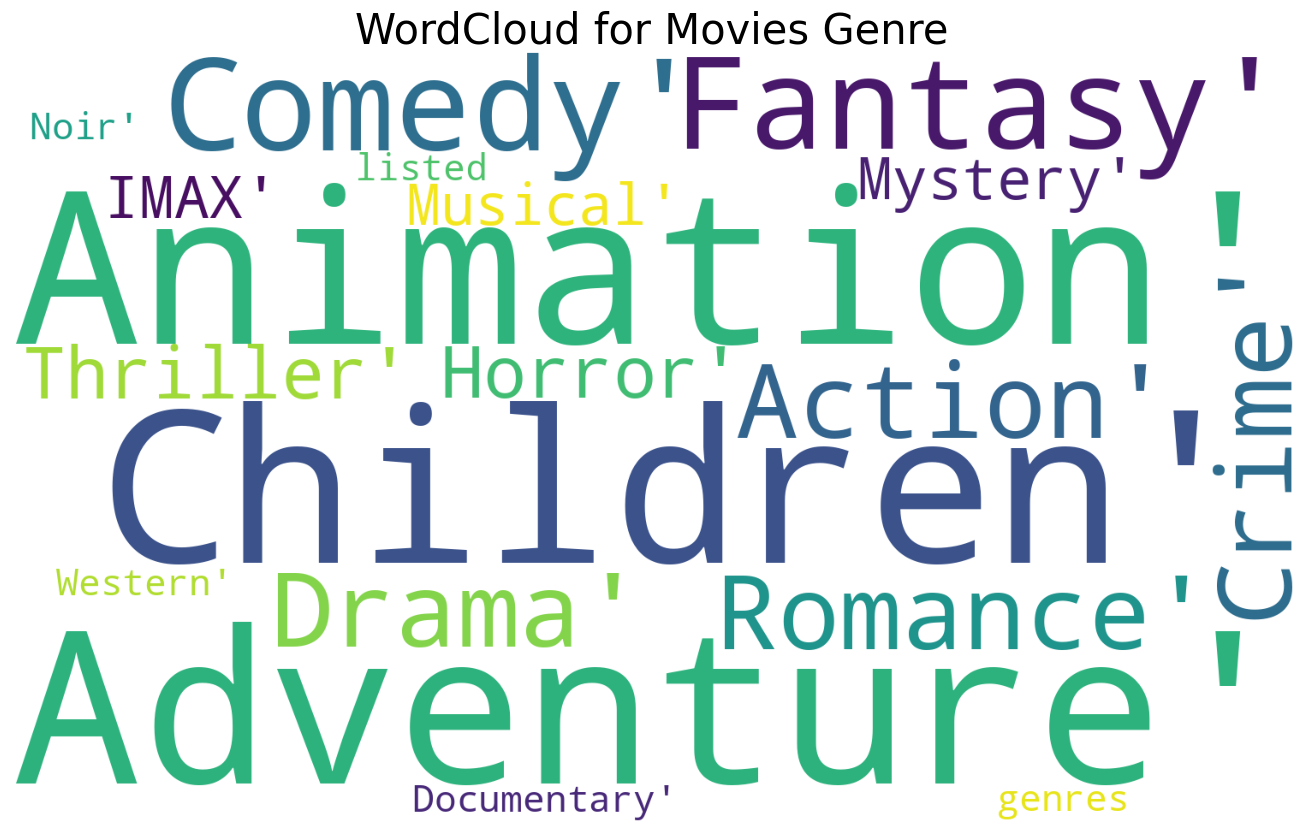

In [59]:
#Visualizing the words used in the Genres :

plt.figure(figsize=(30,10))
plt.axis('off')
plt.title("WordCloud for Movies Genre",fontsize=30)
plt.imshow(word_cloud_genre)

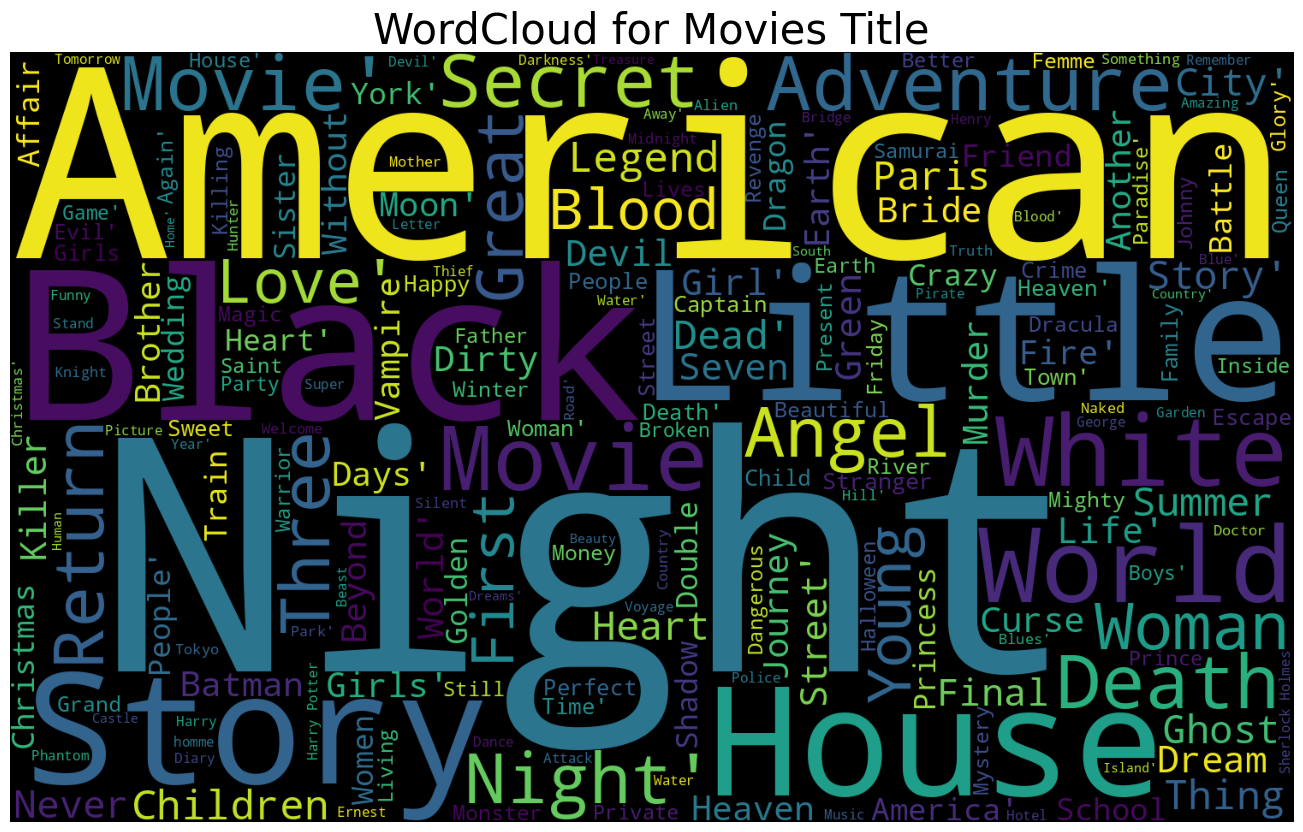

In [60]:
##Visualizing the words used in the Title :

plt.figure(figsize=(30,10))
plt.axis('off')
plt.title("WordCloud for Movies Title",fontsize=30)
plt.imshow(word_cloud_title)

In [61]:
#Merging both the dataframes :

movies_ratings_df=pd.merge(ratings_df,movies_df,on='movieId')
movies_ratings_df

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,9,16,4.0,Casino (1995),Crime|Drama
2,12,16,1.5,Casino (1995),Crime|Drama
3,24,16,4.0,Casino (1995),Crime|Drama
4,29,16,3.0,Casino (1995),Crime|Drama
...,...,...,...,...,...
105331,668,140098,2.5,Runoff (2015),Drama
105332,668,140816,2.5,Tangerine (2015),Comedy|Drama
105333,668,141472,2.5,The 50 Year Argument (2014),(no genres listed)
105334,668,142488,4.0,Spotlight (2015),Thriller


In [62]:
#Dropping duplicates of movies and ratings dataframe :

movies_ratings_df.drop_duplicates(inplace=True)

In [63]:
#Displaying the Highest Rated Movies :

Highest_rated_movies=movies_ratings_df[['title','rating']].groupby('title').sum().sort_values(by='rating',ascending=False).head(10)
Highest_rated_movies

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5
"Matrix, The (1999)",1113.0
Jurassic Park (1993),1076.0
Schindler's List (1993),1065.5
Braveheart (1995),1019.0


<ipython-input-64-99d9593fd00e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar=sns.barplot(x=Highest_rated_movies.index,y='rating',data=Highest_rated_movies,palette=sns.color_palette())


Text(0.5, 0, 'Movies')

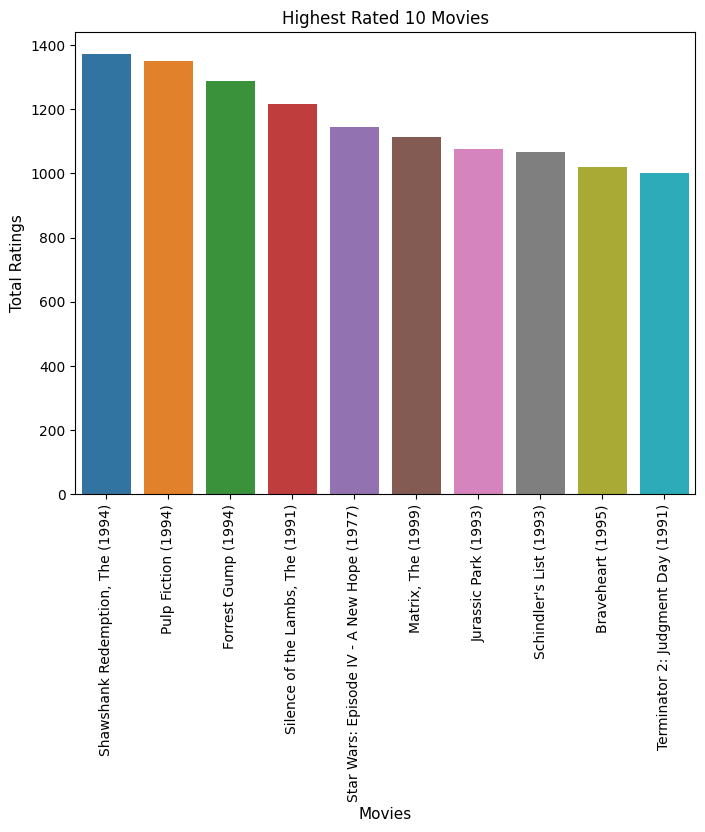

In [64]:
#Visualizing the highest rated movies :

plt.figure(figsize=(8,6))
bar=sns.barplot(x=Highest_rated_movies.index,y='rating',data=Highest_rated_movies,palette=sns.color_palette())
#bar.bar_label(bar.containers[0])
plt.xticks(rotation=90)
plt.title("Highest Rated 10 Movies")
plt.ylabel("Total Ratings", fontsize=11)
plt.xlabel("Movies", fontsize=11)

From the above Bar diagrams we see the top 10 movies by ratings.

Objective 1:

Create a popularity-based recommender system at a genre level. The userwill input a genre (g), minimum rating threshold (t) for a movie,and no. of recommendations(N) for which it should be recommended top N movies which are most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews.

Example:

Input:

•Genre (g) : Comedy

•Minimum reviews threshold(t):100

•Num recommendations (N) : 5

In [65]:
def popularity(genre,min_reviews,num_of_recommendations):

 # Filter by genre and minimum review threshold:
   genre_movies=movies_ratings_df[(movies_ratings_df['genres']==genre)&(movies_ratings_df['rating']>=min_reviews)]

   if genre_movies.empty:
    return "No movies found for the given genre and minimum review threshold."

   sorted_movies=genre_movies.sort_values(by='rating',ascending=False)

   Highest_rated_movies=sorted_movies.head(num_of_recommendations)
   return Highest_rated_movies[['title','rating']]


#Example inputs :
genre= 'Comedy'
minimum_reviews_threshold=5
num_recommendations=100

recommendation=popularity(genre,minimum_reviews_threshold,num_recommendations)
print(recommendation)



                                                   title  rating
1490                                       Clerks (1994)     5.0
68756  Borat: Cultural Learnings of America for Make ...     5.0
68586                                Big Business (1988)     5.0
68599                        Three Men and a Baby (1987)     5.0
68723  Borat: Cultural Learnings of America for Make ...     5.0
...                                                  ...     ...
59483                                   Jerk, The (1979)     5.0
59510                                   Jerk, The (1979)     5.0
59511                                   Jerk, The (1979)     5.0
58487                             Raising Arizona (1987)     5.0
58485                             Raising Arizona (1987)     5.0

[100 rows x 2 columns]


Create a content-based recommender system thatrecommends top N movies based on similar movie(m) genres.

Example:

Input:

•Movie Title (t): Toy Story

•Num recommendations (N): 5

In [66]:
#Content Content based Recommendation :

def content_based_recommender(movie_title,num_recommendations):

  movie_index=movies_ratings_df.index[movies_ratings_df['title']==movies_ratings_df['title']].tolist()[0]

  genres=movies_ratings_df['genres']

  # Applying CountVectorizer :
  cv=CountVectorizer()
  genre_matrix=cv.fit_transform(genres)

  # Calculate cosine similarity between the input movie and all other movies :
  similarity_scores=cosine_similarity(genre_matrix,genre_matrix[movie_index])

  # Enumerate through similarity scores and keep track of movie indices :
  movie_indices_scores=list(enumerate(similarity_scores))

  # Sort movie indices based on similarity scores :
  sorted_movie_indices=sorted(movie_indices_scores,key=lambda x : x[1],reverse=True)

  # Exclude the input movie itself :
  sorted_movie_indices=sorted_movie_indices[1:]

  #Recommend top N similar Movies :
  top_movie_indices = [index for index, _ in sorted_movie_indices[:num_recommendations]]
  recommended_movies = movies_ratings_df.iloc[top_movie_indices]
  return recommended_movies[['title','genres']]

#Example Input :
movie_title= 'Toy Story'
num_recommendations=150

recommendations=content_based_recommender(movie_title,num_recommendations)
print(recommendations)





                                 title       genres
1                        Casino (1995)  Crime|Drama
2                        Casino (1995)  Crime|Drama
3                        Casino (1995)  Crime|Drama
4                        Casino (1995)  Crime|Drama
5                        Casino (1995)  Crime|Drama
...                                ...          ...
2392  Shawshank Redemption, The (1994)  Crime|Drama
2393  Shawshank Redemption, The (1994)  Crime|Drama
2394  Shawshank Redemption, The (1994)  Crime|Drama
2395  Shawshank Redemption, The (1994)  Crime|Drama
2396  Shawshank Redemption, The (1994)  Crime|Drama

[150 rows x 2 columns]


3. Create a collaborative based recommender system which recommends top N
movies based on “K” similar users for a target user “u”
Example:
Input:
➢ UserID: 1
➢ Num recommendations(N): 5
➢ Threshold for similar users (k): 100


In [67]:
#Creating a dataframe using user id , movie id , and ratings columns :

ratings=pd.DataFrame(movies_ratings_df,columns=['userId','movieId','rating'])
ratings

,userId,movieId,rating
0,1,16,4.0
1,9,16,4.0
2,12,16,1.5
3,24,16,4.0
4,29,16,3.0
...,...,...,...
105331,668,140098,2.5
105332,668,140816,2.5
105333,668,141472,2.5
105334,668,142488,4.0


In [44]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


def get_top_N_recommendations(user_id, N, k, ratings):

    # Filter ratings for the target user :
    target_user_ratings = ratings[ratings['userId'] == user_id]

    # Get all other users who have rated the same movies as the target user
    similar_users = ratings[ratings['movieId'].isin(target_user_ratings['movieId'])]

    # Calculate cosine similarity between users :
    similarity_matrix = cosine_similarity(target_user_ratings['rating'].values.reshape(1, -1),
                                          similar_users.pivot_table(index='userId', columns='movieId', values='rating').fillna(0))

    # Convert similarity matrix into DataFrame :
    similarity_df = pd.DataFrame(similarity_matrix.T, index=similar_users['userId'].unique(), columns=['Similarity'])

    # Get top k similar users :
    top_similar_users = similarity_df.sort_values(by='Similarity', ascending=False).head(k)

    # Get all ratings of top similar users :
    top_similar_users_ratings = ratings[ratings['userId'].isin(top_similar_users.index)]

    # Exclude movies already rated by the target user :
    top_similar_users_ratings = top_similar_users_ratings[~top_similar_users_ratings['movieId'].isin(target_user_ratings['movieId'])]

    # Group ratings by movie and calculate average rating
    movie_ratings_mean = top_similar_users_ratings.groupby('movieId')['rating'].mean().reset_index()

    # Get top N movies
    top_N_movies = movie_ratings_mean.sort_values(by='rating', ascending=False).head(N)

    return top_N_movies

# Example usage
ratings = pd.read_csv('ratings.csv')  # Assuming ratings are stored in a CSV file

user_id = 1
N = 5
k = 100
top_N_recommendations = get_top_N_recommendations(user_id, N, k, ratings)
print(top_N_recommendations)


      movieId  rating
5474    25961     5.0
4553     6924     5.0
4420     6672     5.0
4552     6923     5.0
439       568     5.0
